# 1. Introduction

The Pokemon dataset was chosen because we have a shared interest in Pokemon and we have many interesting unanswered questions we would like to investigate. These questions are: Does power creep exist (increase in strength over the generations)? Is there a correlation between the physical characteristics of a pokemon and its actual in-game stats? Is there a "best" type in terms of effectiveness and stats? Is there a most common typing?, How big is the disparity in strength between legendary and non-legendary pokemon?

Team: Ravichandra Pogaku, Gowtham Rajendra, and Ivan Wang

# 2. Description of data<br>
Dataset Name: The Complete Pokemon Dataset<br>
URL: https://www.kaggle.com/rounakbanik/pokemon<br>
The dataset contains information on 801 Pokemon from the 7 regions in the world of Pokemon. The regions
ranging from Kanto, Johto, Hoenn, Sinnoh, Unova, Kalos, and the Alola. The dataset includes
information such as names, types, stats, classification, and more.<br> This dataset was created by
Rounak Banik and posted on kaggle, the information for the dataset was obtained from Serebii.net
(http://serebii.net/)


# 3. Analysis of Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pokemon.csv")

Checking how our data looks like:

In [ ]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

This shows us that there are actually a few columns actually contain null values. The columns being "height_m", "percentage_male", "type_2", and "weight_kg". We can try to investigate why this is the case.<br><br>
First, we see that the number of pokemon with weight and height missing are the same. So, we will display them and look for any clues. 

In [ ]:
df[df['weight_kg'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,56,3840,70,253,255,Mouse Pokémon,35,1000000,NaN,30,Korattaコラッタ,Rattata,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,71,3840,70,413,127,Mouse Pokémon,70,1000000,NaN,75,Rattaラッタ,Raticate,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.00,1.0,1.0,0.5,1.0,85,2560,70,485,75,Mouse Pokémon,50,1000000,NaN,60,Raichuライチュウ,Raichu,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,75,5120,70,300,255,Mouse Pokémon,90,1000000,NaN,50,Sandサンド,Sandshrew,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,100,5120,70,450,90,Mouse Pokémon,120,1000000,NaN,75,Sandpanサンドパン,Sandslash,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.00,1.0,2.0,0.5,2.0,41,5120,70,299,190,Fox Pokémon,40,1000000,NaN,38,Rokonロコン,Vulpix,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.00,1.0,2.0,0.5,2.0,67,5120,70,505,75,Fox Pokémon,75,1000000,NaN,73,Kyukonキュウコン,Ninetales,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,55,5120,70,265,255,Mole Pokémon,30,1000000,NaN,10,Digdaディグダ,Diglett,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,100,5120,70,425,50,Mole Pokémon,60,1000000,NaN,35,Dugtrioダグトリオ,Dugtrio,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,35,5120,70,290,255,Scratch Cat Pokémon,35,1000000,NaN,40,Nyarthニャース,Meowth,50.0,52,50,40,90,normal,dark,NaN,1,0


In [ ]:
df[df['height_m'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,56,3840,70,253,255,Mouse Pokémon,35,1000000,NaN,30,Korattaコラッタ,Rattata,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,71,3840,70,413,127,Mouse Pokémon,70,1000000,NaN,75,Rattaラッタ,Raticate,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.00,1.0,1.0,0.5,1.0,85,2560,70,485,75,Mouse Pokémon,50,1000000,NaN,60,Raichuライチュウ,Raichu,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,75,5120,70,300,255,Mouse Pokémon,90,1000000,NaN,50,Sandサンド,Sandshrew,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,100,5120,70,450,90,Mouse Pokémon,120,1000000,NaN,75,Sandpanサンドパン,Sandslash,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.00,1.0,2.0,0.5,2.0,41,5120,70,299,190,Fox Pokémon,40,1000000,NaN,38,Rokonロコン,Vulpix,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.00,1.0,2.0,0.5,2.0,67,5120,70,505,75,Fox Pokémon,75,1000000,NaN,73,Kyukonキュウコン,Ninetales,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,55,5120,70,265,255,Mole Pokémon,30,1000000,NaN,10,Digdaディグダ,Diglett,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.50,1.0,0.5,1.0,2.0,100,5120,70,425,50,Mole Pokémon,60,1000000,NaN,35,Dugtrioダグトリオ,Dugtrio,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,35,5120,70,290,255,Scratch Cat Pokémon,35,1000000,NaN,40,Nyarthニャース,Meowth,50.0,52,50,40,90,normal,dark,NaN,1,0


We believe these are errors in data collection because all pokemon have weight and height values. These errors are due to the fact that these pokemon appear in multiple forms which possess different characteristics (weight and height). This does not effect any other columns because for abilities, it lists all the abilities for all forms of that pokemon and for the stats of that pokemon, it uses the values of the second version of that pokemon (order as shown on https://pokemondb.net/). Another note is that the pokemon that don't possess weight values are the same ones that don't possess height values. We will need to deal with this during data cleaning.

Next, we can check for the null values in the "percentage_male" column:

In [ ]:
df[df['percentage_male'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,0.50,4.0,0.5,0.5,0.0,0.5,0.5,0.25,1.0,35,5120,70,325,190,Magnet Pokémon,70,1000000,0.3,25,Coilコイル,Magnemite,NaN,81,95,55,45,electric,steel,6.0,1,0
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.50,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,0.50,4.0,0.5,0.5,0.0,0.5,0.5,0.25,1.0,60,5120,70,465,60,Magnet Pokémon,95,1000000,1.0,50,Rarecoilレアコイル,Magneton,NaN,82,120,70,70,electric,steel,60.0,1,0
99,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,1.00,2.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,30,5120,70,330,190,Ball Pokémon,50,1000000,0.5,40,Biriridamaビリリダマ,Voltorb,NaN,100,55,55,100,electric,NaN,10.4,1,0
100,"['Soundproof', 'Static', 'Aftermath']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,1.00,2.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,50,5120,70,490,60,Ball Pokémon,70,1000000,1.2,60,Marumineマルマイン,Electrode,NaN,101,80,80,150,electric,NaN,66.6,1,0
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.50,0.5,45,5120,70,340,225,Starshape Pokémon,55,1250000,0.8,30,Hitodemanヒトデマン,Staryu,NaN,120,70,55,85,water,NaN,34.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.50,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.50,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.00,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.50,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.00,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.00,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.00,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.00,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


With some prior knowledge in Pokemon or some research in it, we find that the pokemon with null values are genderless. This is something we can change in the data cleaning process.

Finally, we will check the "type2" column. This column has an alarmingly large amount of null values.

In [ ]:
df[df['type2'].isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
6,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,"['Bulletproof', 'Soundproof', 'Overcoat']",1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,Jyarakoジャラコ,Jangmo-o,50.0,782,45,45,45,dragon,NaN,29.7,7,0
788,['Unaware'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,29,30720,0,200,45,Nebula Pokémon,31,1250000,0.2,43,Cosmogコスモッグ,Cosmog,NaN,789,29,31,37,psychic,NaN,0.1,7,1
789,['Sturdy'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,29,30720,0,400,45,Protostar Pokémon,131,1250000,0.1,43,Cosmovumコスモウム,Cosmoem,NaN,790,29,131,37,psychic,NaN,999.9,7,1
795,['Beast Boost'],1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,89,30720,0,570,30,Glowing Pokémon,71,1250000,3.8,83,Denjyumokuデンジュモク,Xurkitree,NaN,796,173,71,83,electric,NaN,100.0,7,1


Again, with some prior knowledge in Pokemon or some research in it, we realize that this is because of many Pokemon only having one type. We believe this does not need to be dealt with as having an null value can be a good indicator of a Pokemon not having a second type. 

After having checked the columns with null values, we can now check for any duplicate Pokemon entries. 

In [ ]:
df.duplicated(subset = 'name').sum()

0

We find that there are actually no duplicate entries of Pokemon. We do not need to check the other columns because they are just statistics/trait that are shared by many Pokemon. So, having an entry for each unique Pokemon is sufficient.

Overall, there were not many issues with the dataset. The only problems were the few columns that contained null values. But, we plan to edit those columns in the data cleaning step accordingly. We plan to add the missing weight and height values and replace the null values in the "percentage_male" column with "Genderless" to indicate which Pokemon are always Genderless.

# Data Cleaning

Cleaning the null weight and height values:

In [ ]:
missingWeights = (3.8, 25.5, 21.0, 40.0, 55.0, 9.9, 19.9, 1.0, 66.6, 4.2, 33.0, 20.3, 110.0, 316.0, 42.0, 52.0, 415.6, 34.0, 490.0, 25.0)
df.loc[df.weight_kg.isnull(), 'weight_kg'] = missingWeights
missingHeights = (0.3, 0.7, 0.7, 0.7, 1.2, 0.6, 1.1, 0.2, 0.7, 0.4, 1.1, 0.4, 1.0, 1.7, 0.7, 1.0, 10.9, 1.0, 6.5, 1.1)
df.loc[df.height_m.isnull(), 'height_m'] = missingHeights

df.loc[[719]]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
719,['Magician'],1.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0,0.5,0.5,1.0,1.0,1.0,160,30720,100,680,3,Mischief Pokémon (Confined)Djinn Pokémonn (Unb...,60,1250000,6.5,80,Hoopa (imashimerareshi Hoopa)フーパ,Hoopa,NaN,720,170,130,80,psychic,ghost,490.0,6,1


Gathered the weight and height values of the pokemon with null values and inputted them into the dataframe. Information acquired from https://pokemondb.net/

Cleaning the null percentage_male values:

In [ ]:
genderless = df[df['percentage_male'].isna()].groupby('generation').count()
print(genderless['name'])

df.percentage_male[df.percentage_male.isna()] = "Genderless"
df

generation
1    13
2     8
3    16
4    17
5    16
6     7
7    21
Name: name, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,Genderless,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,Genderless,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,Genderless,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,Genderless,800,127,89,79,psychic,NaN,230.0,7,1


All pokemon with null percentage_male value are genderless because these values correspond with the number of genderless pokemon in every generation  (generetaion 7 is only 21 because the data set stops at Magearna). Pokemon that are always female have 0 as the value already. This was confirmed using https://pokemon.fandom.com/wiki/Gender#Generation_I. We changed all NaN to 'Genderless'.

# 4. Exploratory Data Analysis

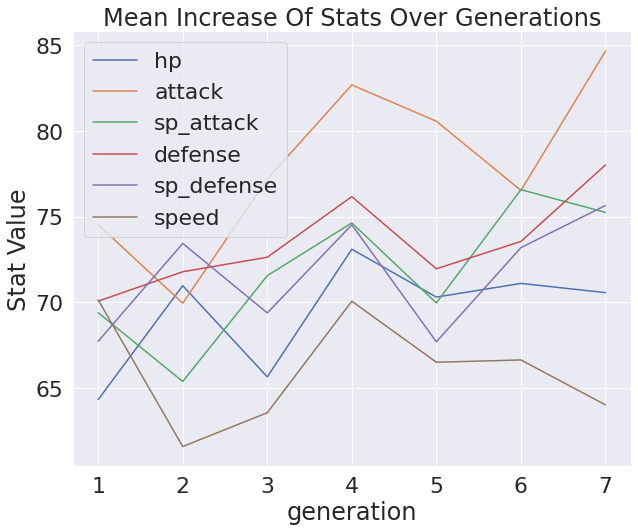

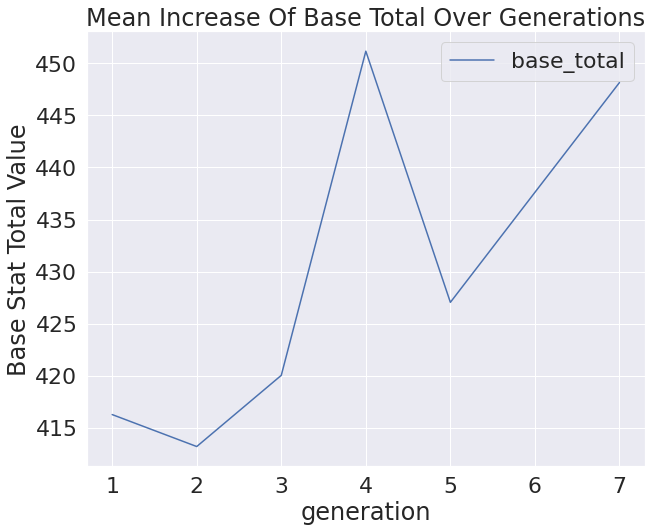

In [ ]:
statsPerGen = df.groupby('generation').mean()
#statsPerGen[['base_total', 'hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']]
statsPerGen.plot(y=['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed'], kind="line", figsize=(10, 8), title="Mean Increase Of Stats Over Generations", ylabel="Stat Value");
statsPerGen.plot(y=['base_total'], kind="line", figsize=(10, 8), title="Mean Increase Of Base Total Over Generations", ylabel="Base Stat Total Value");

From this graph we can see a spike in the base stats of the fourth generation. With prior knowledge in Pokemon, it can be inferred this is due to that fact that more very strong pokemon were introduced in the fourth generation compared to other generations which resulted in it being the "Strongest" generation. This generation is also widely known for the trend in power creep that it introduced as seen in the large increase in the base stats. The huge downward spike from the fourth generation to the fifth is due to the fact that the fifth generation comprised of a completely new set of pokemon without any from previous generations resulting it a different power balance for that generation. After which a linear increase in power is seen until the seventh generation where it resides close to the fourth generation's power.

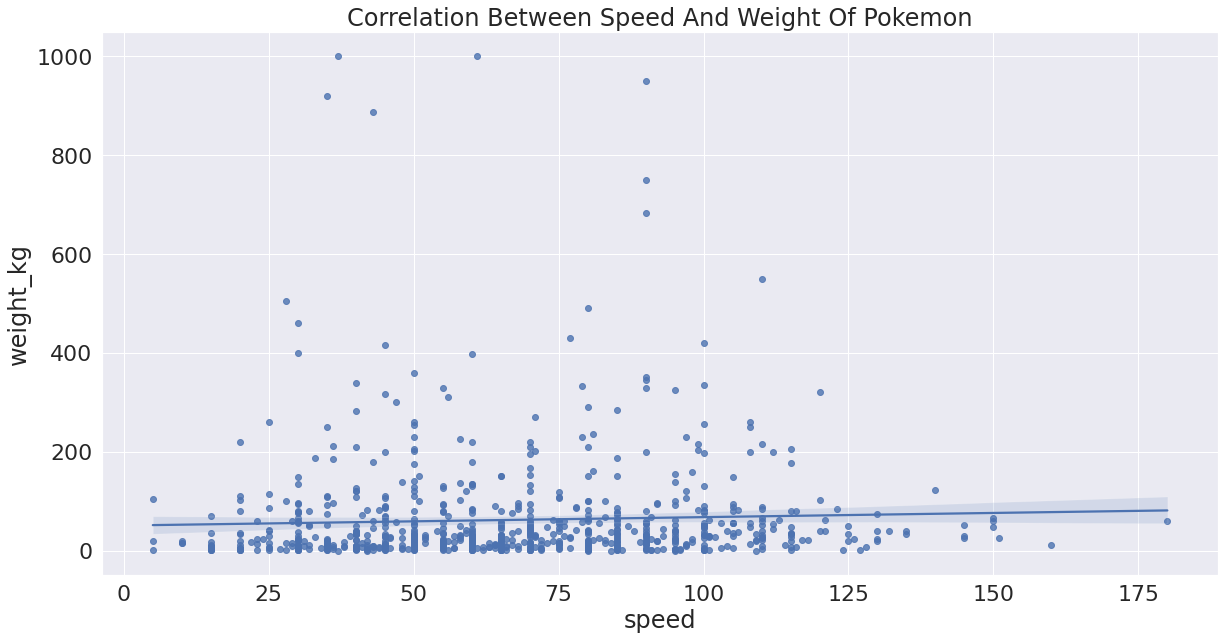

In [ ]:
plt.figure(figsize=(20,10));
sns.set(font_scale=2)
sns.regplot(data = df, x = 'speed', y = 'weight_kg');
plt.title("Correlation Between Weight And Speed Of Pokemon");
plt.title("Correlation Between Speed And Weight Of Pokemon");

Surprisingly there is no correlation between the weight and speed stat of Pokemon. This was surprising because it would make sense for heavier pokemon to be slower but this just shows that pokemon's stats are not too closely related to their height, weight, and designs.

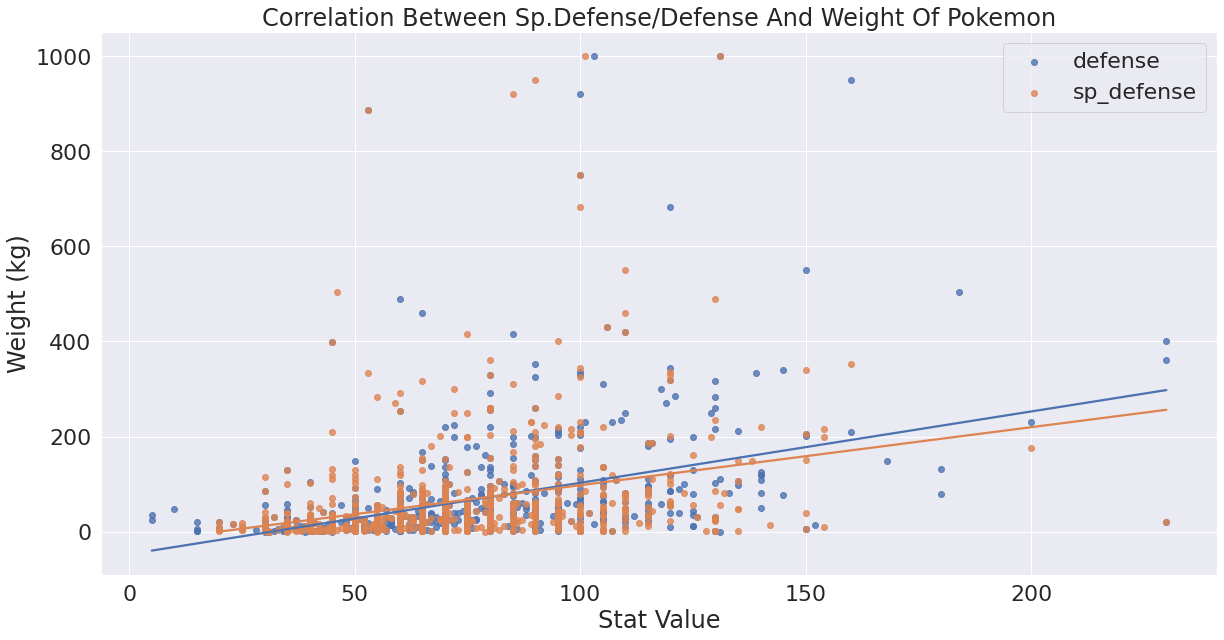

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(data = df, x = 'defense', y = 'weight_kg', fit_reg=True, ci=None, ax=ax, label='defense');
sns.regplot(data = df, x = 'sp_defense', y = 'weight_kg', fit_reg=True, ci=None, ax=ax, label='sp_defense');
plt.title("Correlation Between Sp.Defense/Defense And Weight Of Pokemon");
ax.set(ylabel='Weight (kg)', xlabel='Stat Value');
ax.legend()
plt.show()

There seems to be a moderate correlation between the defense stats (physical and special) and the weight of pokemon. This is surprising considering speed and weight are not correlated in any way.

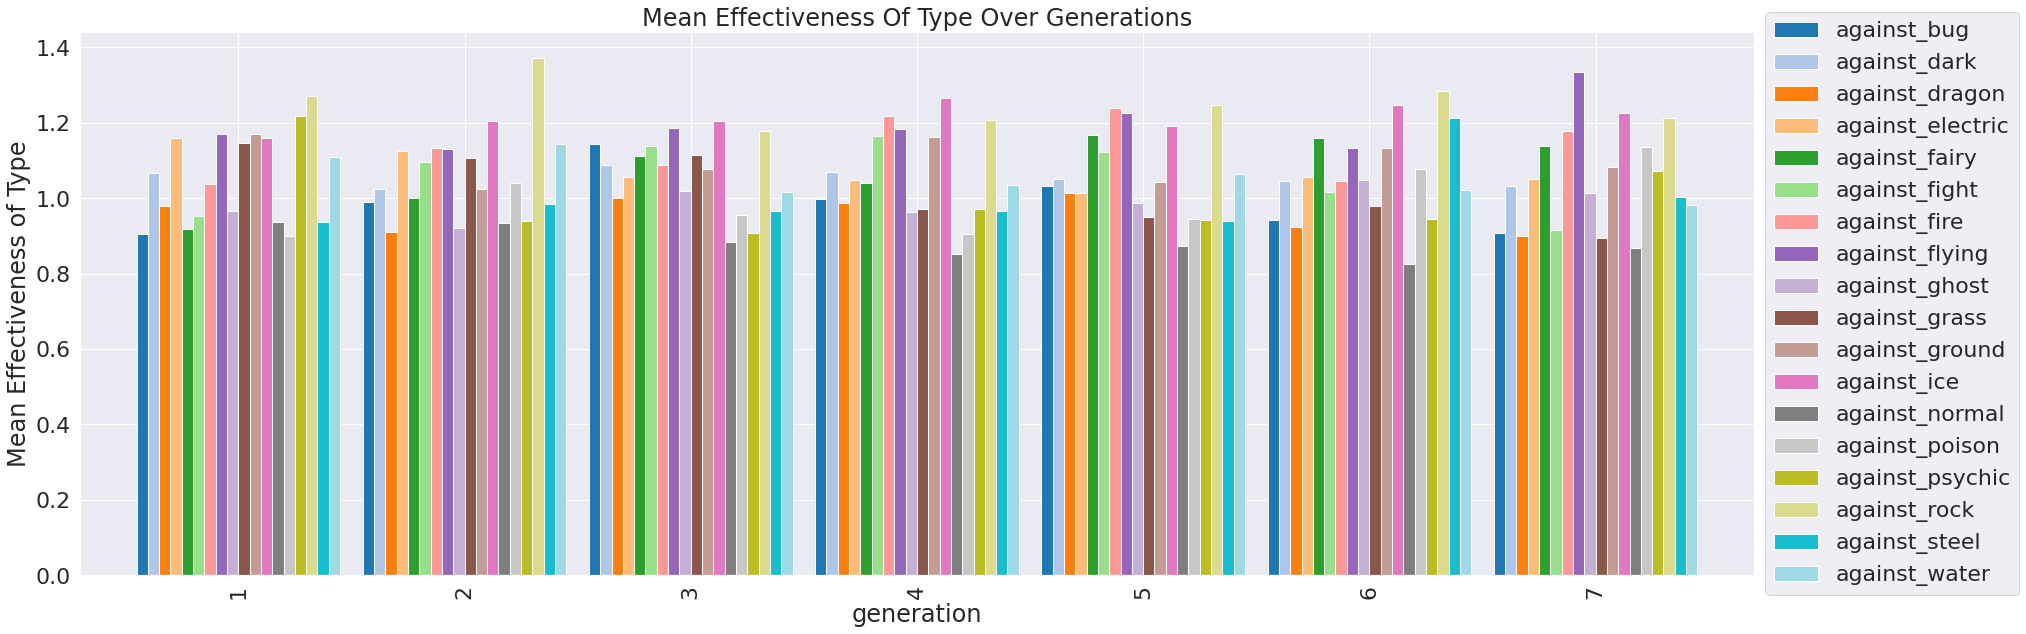

In [ ]:
statsPerGen.plot(y=(statsPerGen.iloc[:, :18].columns), kind="bar", figsize=(30, 10), title="Mean Effectiveness Of Type Over Generations", ylabel="Mean Effectiveness of Type", width=0.9, colormap = 'tab20').legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

This shows the effectiveness of types in their respective generations. i.e. in the first generation more pokemon were weak to rock type than other types. 

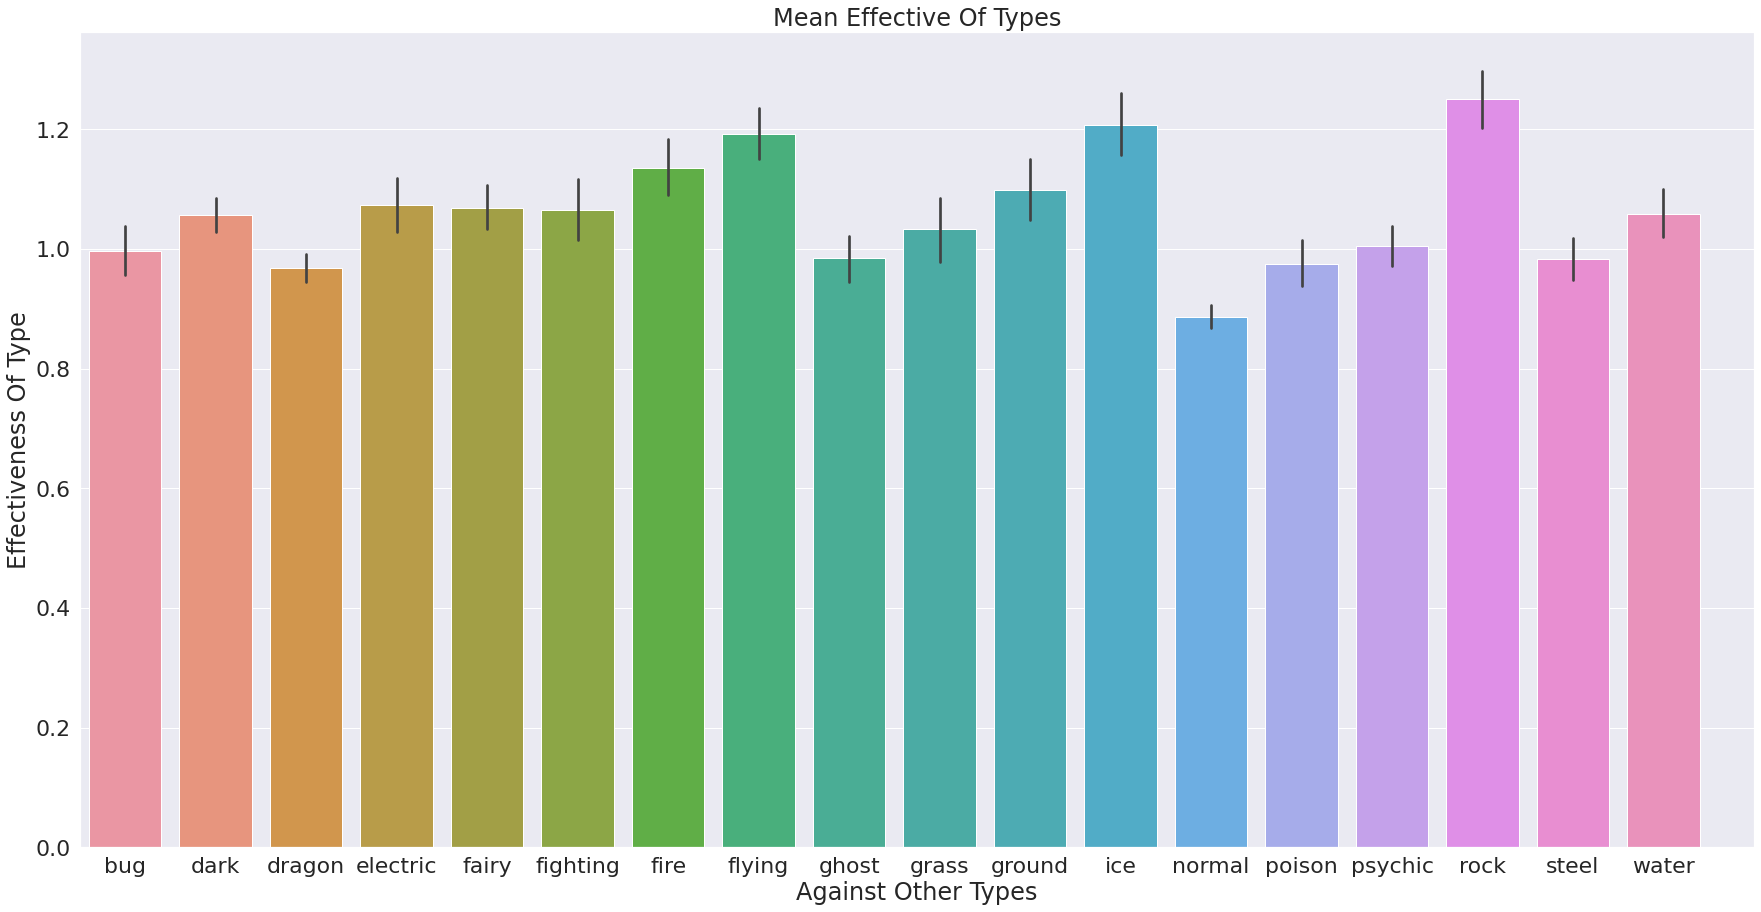

In [ ]:
df2 = df.iloc[:, 1:19]

plt.figure(figsize=(30,15));
sns.barplot(data = df2);
plt.xticks(ticks=np.arange(19), labels=("bug","dark","dragon","electric","fairy","fighting","fire","flying","ghost","grass","ground","ice","normal","poison","psychic","rock","steel","water"))
plt.title("Mean Effective Of Types");
plt.xlabel("Against Other Types");
plt.ylabel("Effectiveness Of Type");

Overall rock is the most effective type. This is due to that fact that rock is effective against flying, ice, fire and bug. Flying and bug are among the most common types as shown in the following two graphs. Ice is the second most effective type. Ice is effective against flying, grass, ground, and dragon. Flying and grass are very common types. Flying is the third most effective. Flying is effective against fighting, grass, and bug. Grass and bug are very common types but not as common as flying type pokemon which is why rock and ice are more effective in general.

Frequency of types as the primary type of a pokemon:

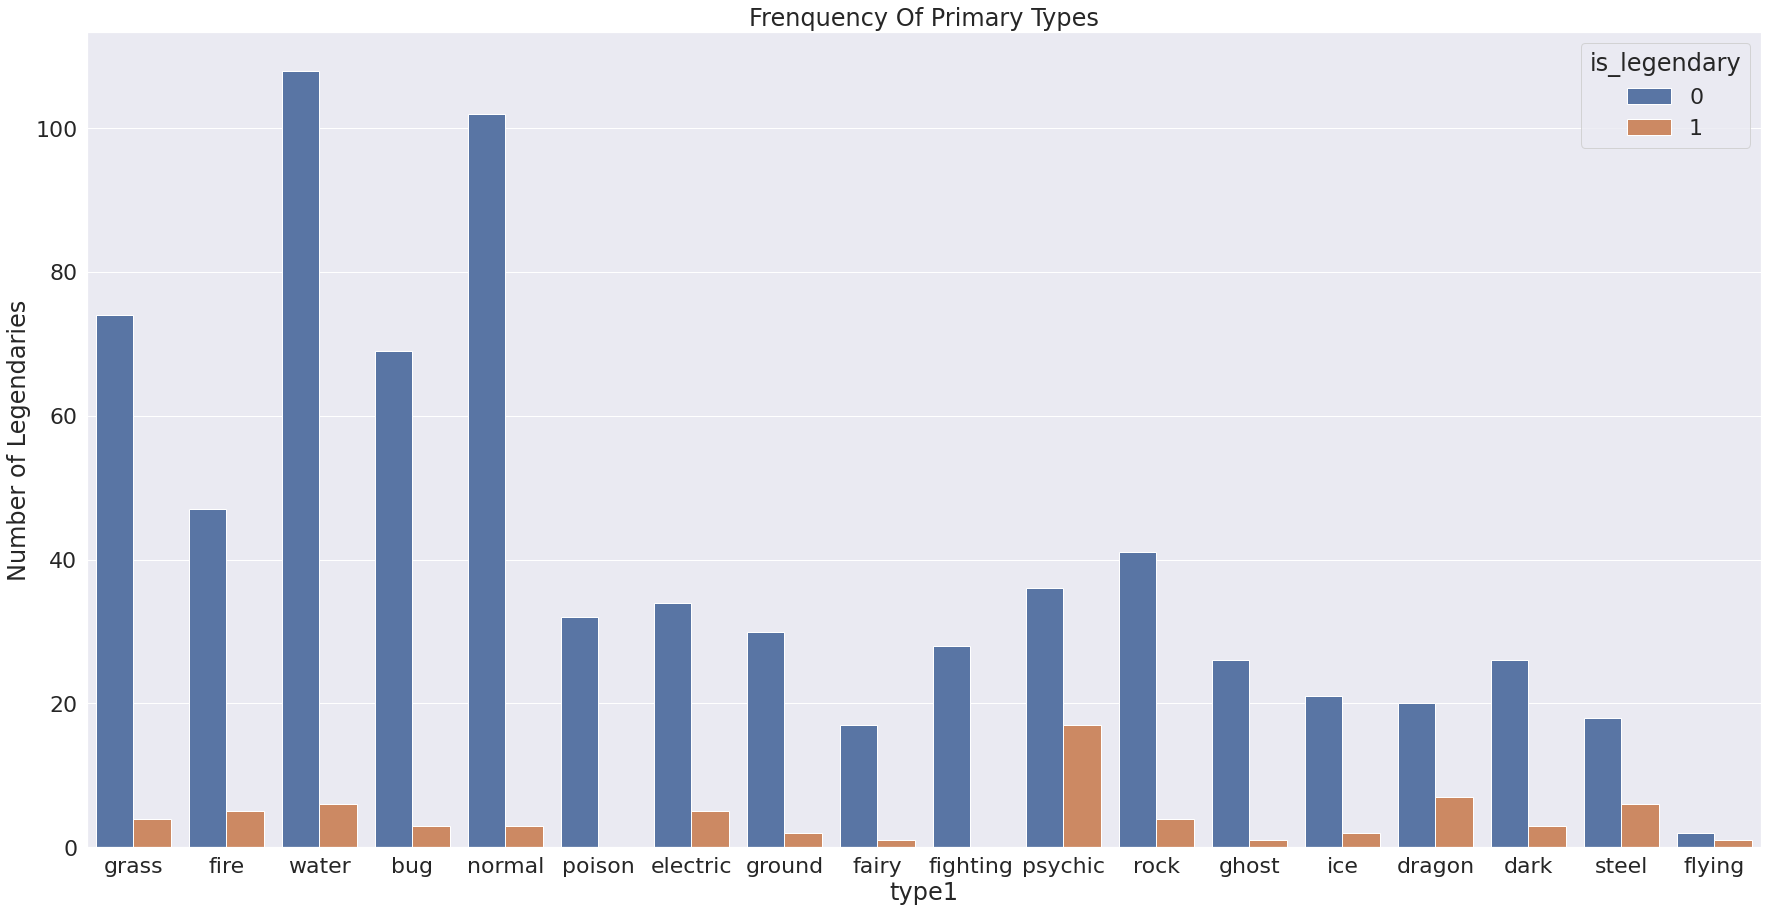

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data = df, x = 'type1', hue = 'is_legendary')
plt.title("Frenquency Of Primary Types");
plt.ylabel("Number of Legendaries");

Water, normal grass, and bug typing is the most common primary typing for pokemon. Normal type has a very high count because most of the flying type pokemon are also normal types, but flying type is usually listed as the secondary type. Flying being the least common primary type for a pokemon as shown by the graph.

Frequency of types as the secondary type of a pokemon:

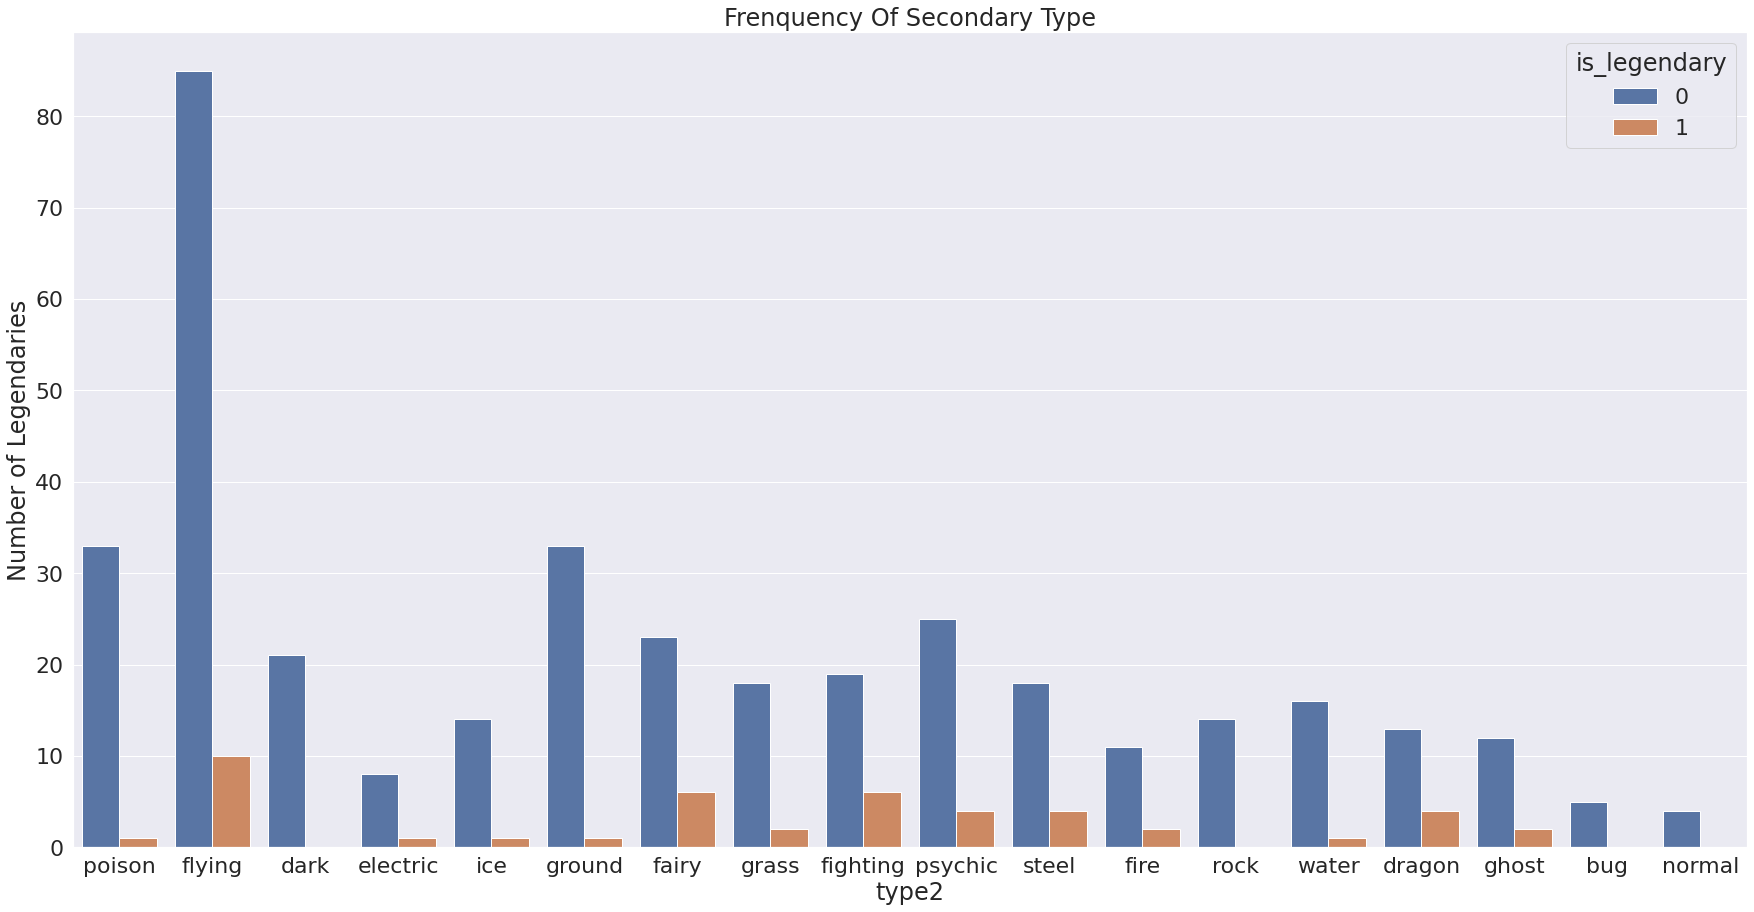

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data = df, x = 'type2', hue = 'is_legendary')
plt.legend(title="is_legendary", loc="upper right")
plt.title("Frenquency Of Secondary Type");
plt.ylabel("Number of Legendaries");

As mentioned above, Flying is the most common secondary typing and also shares most of its pokemon with a primary type of normal.

Average Base Stats of all the Types:

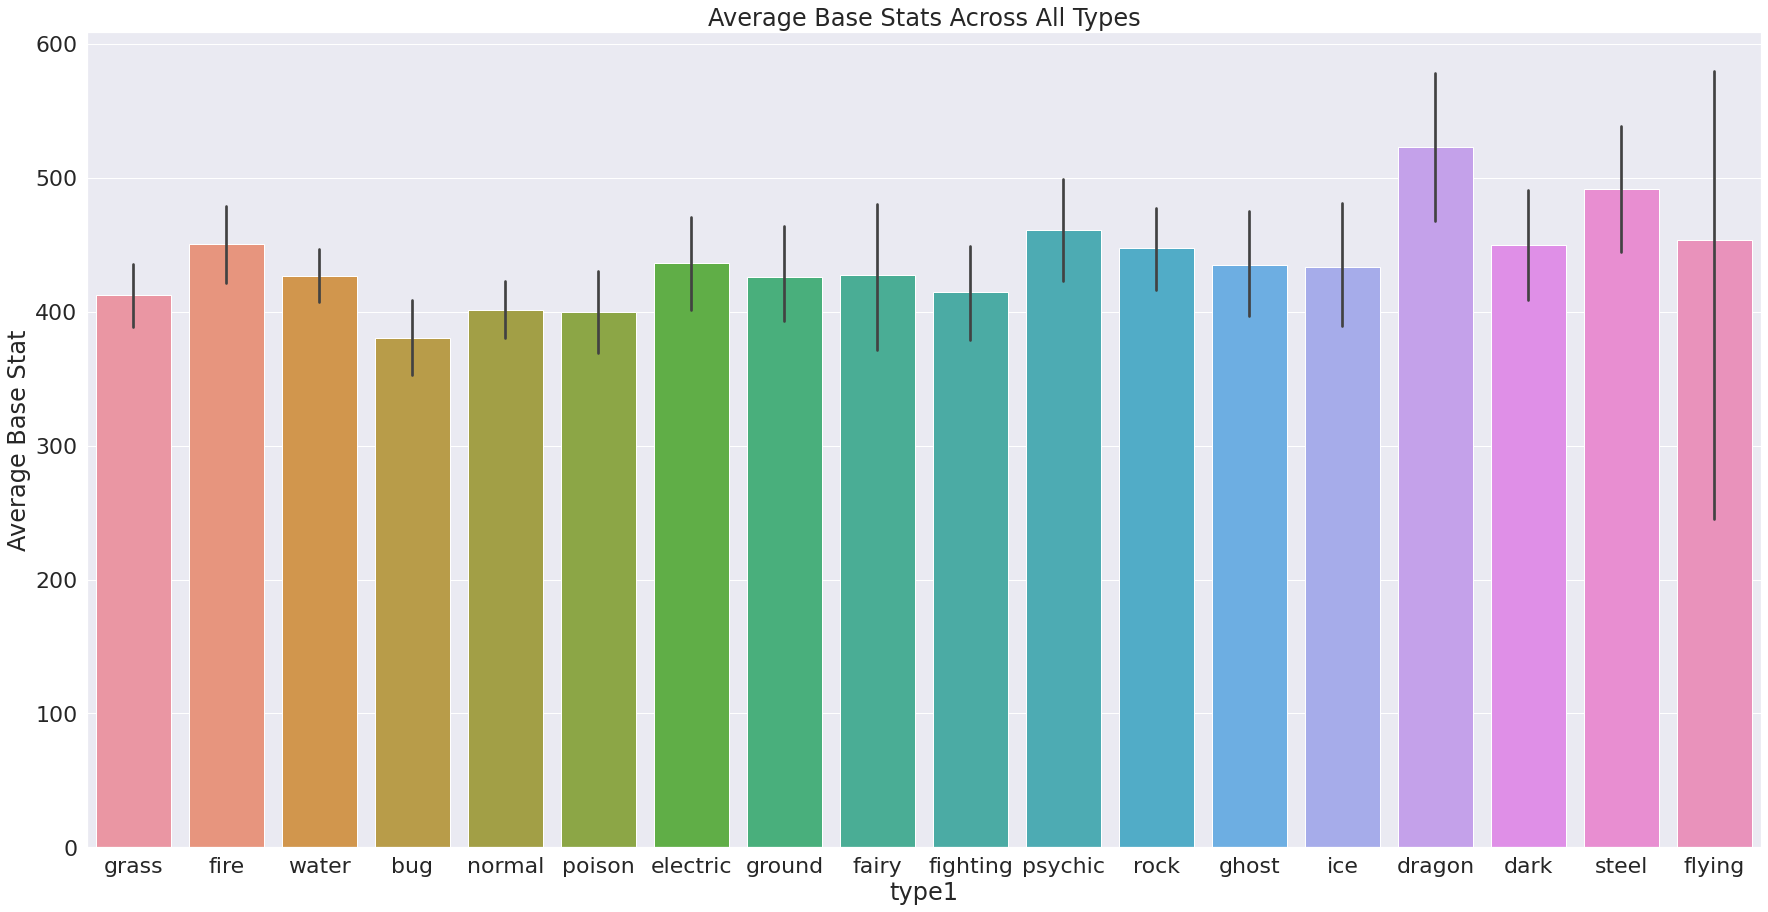

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(data = df, x = 'type1', y = 'base_total');
plt.title("Average Base Stats Across All Types");
plt.ylabel("Average Base Stat");

Dragon and steel type pokemon are on average the strongest in terms of base stats. The wild deviation of flying type is also something to take note of.

Average Base Stats of Pokemon with One Type:

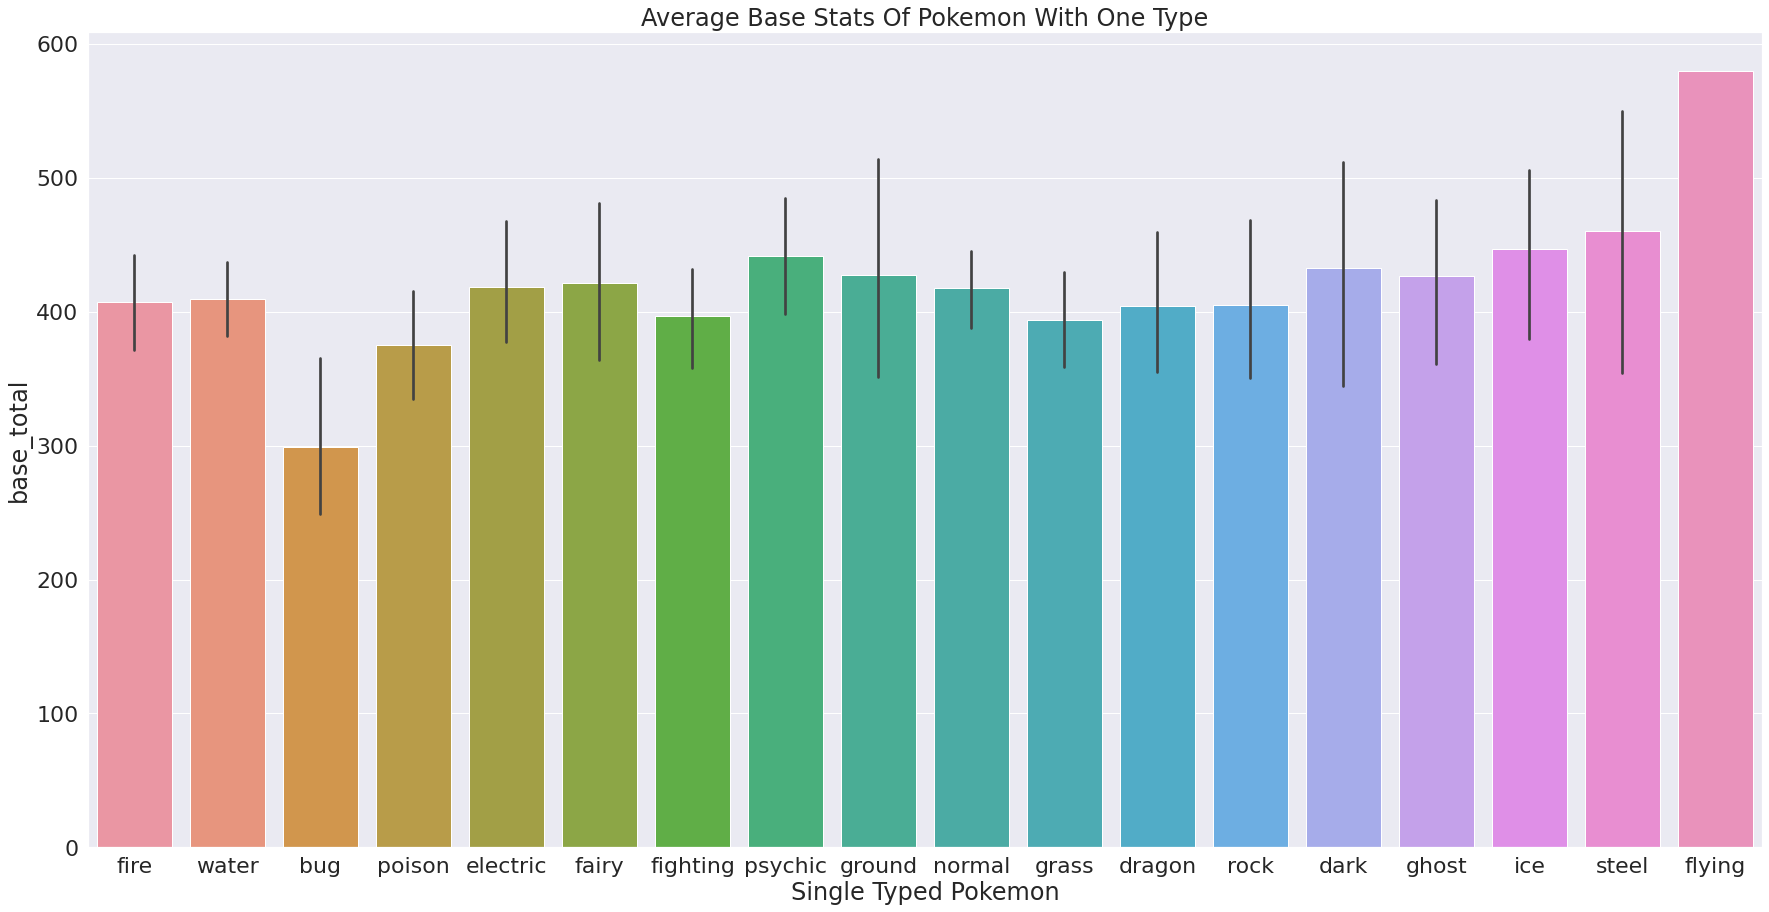

In [ ]:
dual_types = df[df.type2.notna()]
one_type = df[df.type2.isna()]

plt.figure(figsize=(30,15))
sns.barplot(data = one_type, x = 'type1', y = 'base_total');
plt.xlabel("Single Typed Pokemon");
plt.title("Average Base Stats Of Pokemon With One Type");

Of the pokemon with only a single type, Flying type is the strongest in terms of base stats. This is actually not true and can be inferred from the fact that there is no deviation in that bar. This is because there is only one pokemon that is only flying type, being Tornadus with a base stat total of 580, which corresponds with the value of the bar. Ignoring flying type, steels and ground seem to be the strongest types among single typed pokemon.

Average Base Stats of Pokemon with Two Types:





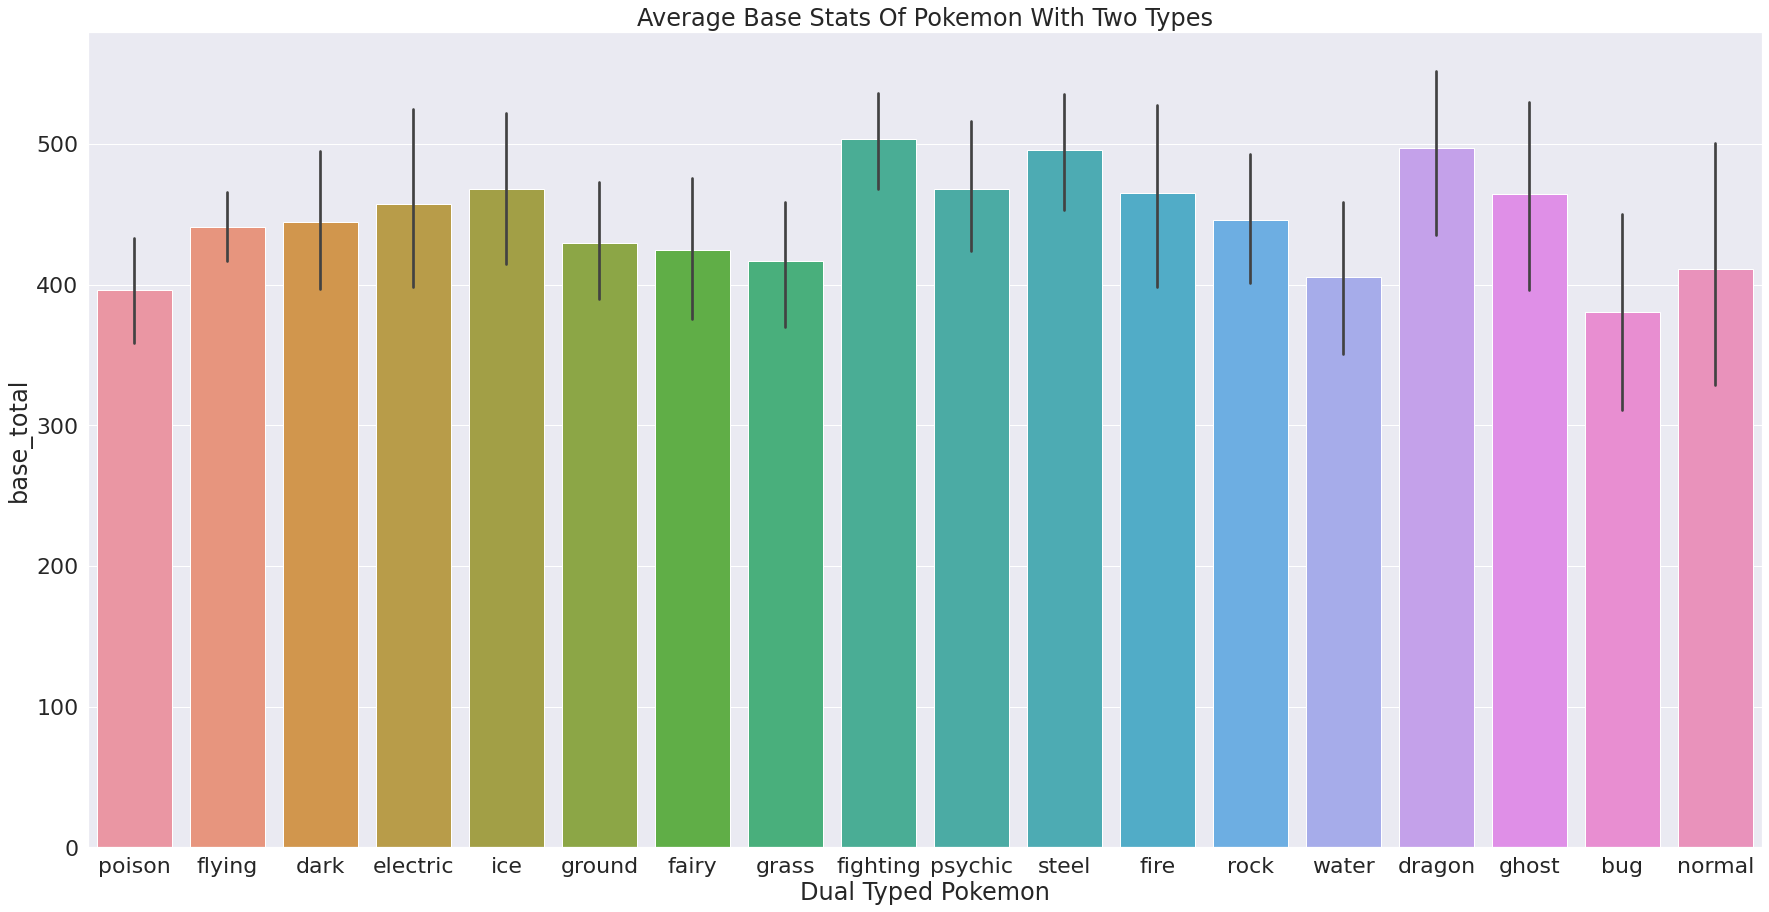

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(data = dual_types, x = 'type2', y = 'base_total');
plt.xlabel("Dual Typed Pokemon");
plt.title("Average Base Stats Of Pokemon With Two Types");

Each bar representing pokemon with that type as their secondary typing Fighting, Dragon, and Steel are the most powerful types among pokemon with two types. This makes sense as many legendary pokemon (some of the most powerful pokemon in general) are dragon types. Fighting and steel have many strong legendary and non-lengendary pokemon in general.

Comparing the Average Base Stats of Single Typed vs Dual Typed Pokemon:

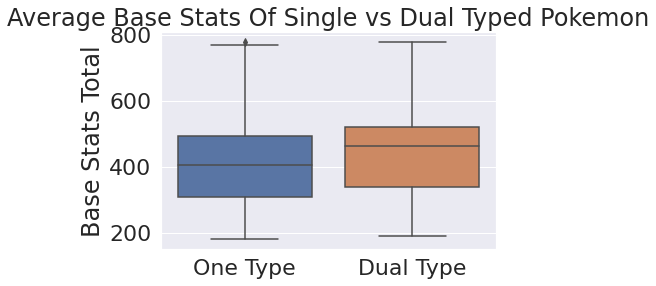

In [ ]:
df3 = [one_type.base_total, dual_types.base_total]
type_comp = sns.boxplot(data = df3)
type_comp.set_xticklabels(['One Type','Dual Type']);
type_comp.set(ylabel='Base Stats Total');
plt.title("Average Base Stats Of Single vs Dual Typed Pokemon");

Dual type pokemon are on average always stronger than single typed pokemon. This could be due to the fact that most strong and legendary pokemon are dual typed and many unevolved forms of pokemon are single typed.

Number of Legendary Pokemon Per Generation:

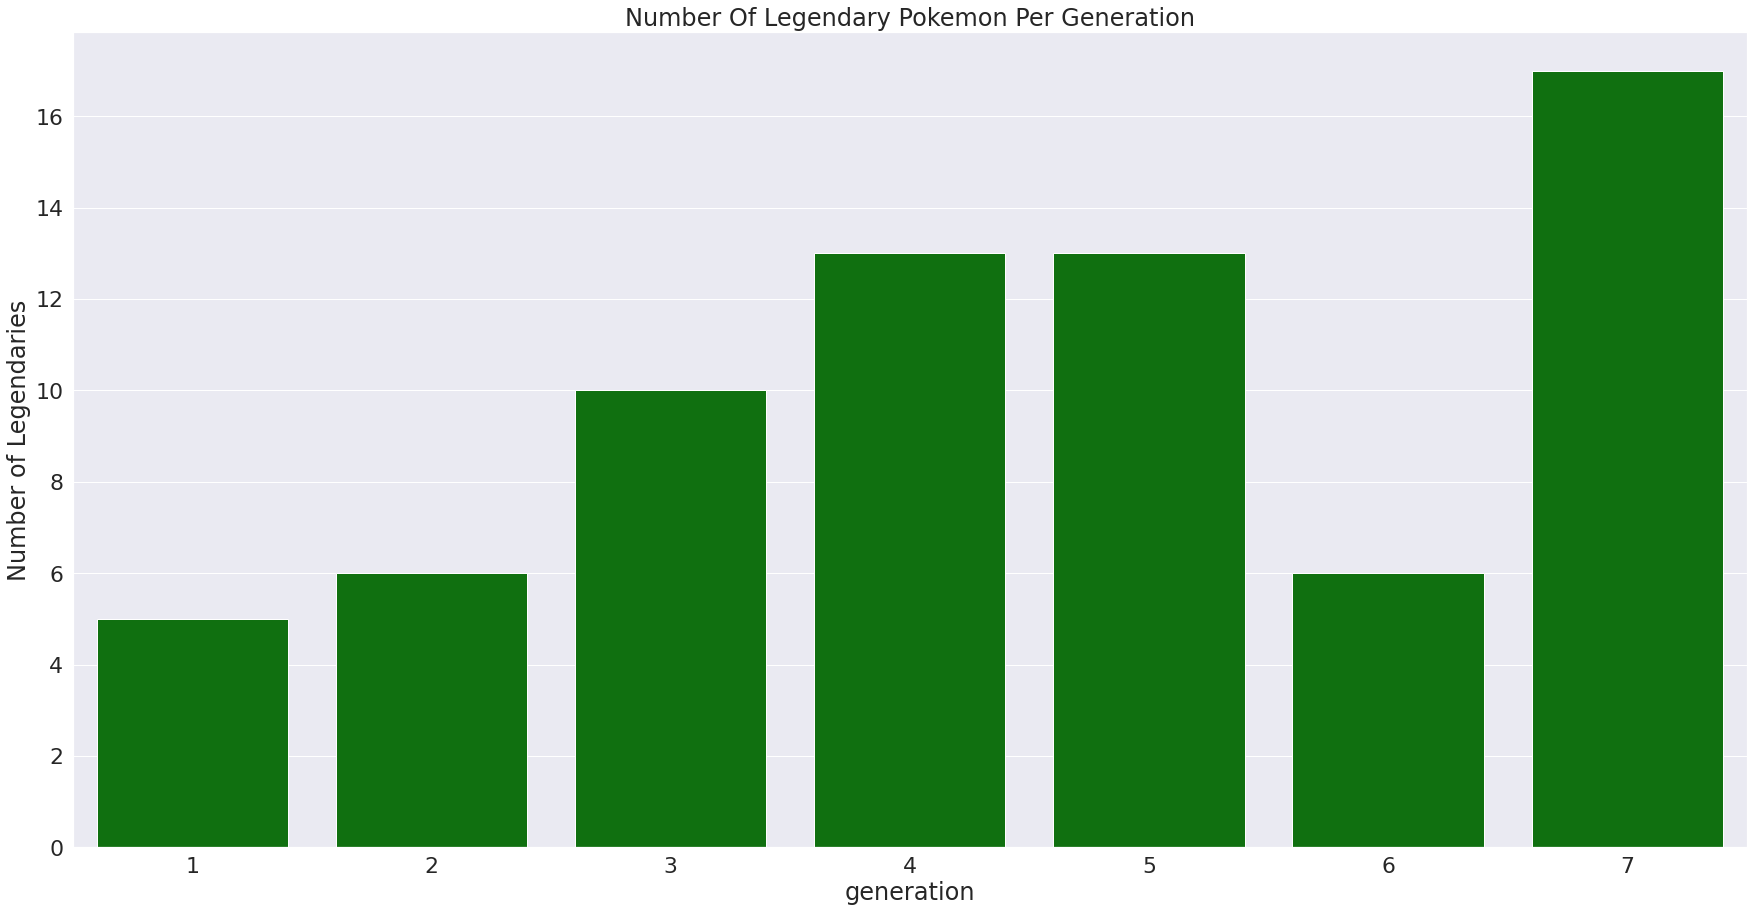

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data = df.loc[df['is_legendary'] == 1], x = 'generation', color='green');
plt.title("Number Of Legendary Pokemon Per Generation");
plt.ylabel("Number of Legendaries");

This is a linear increase in the number of legendary pokemon added in each generation, with the sixth generation being an outlier. The sixth generation did not introduce many new legendary pokemon.

Base Stats of Legendary vs Non-Legendary Pokemon:

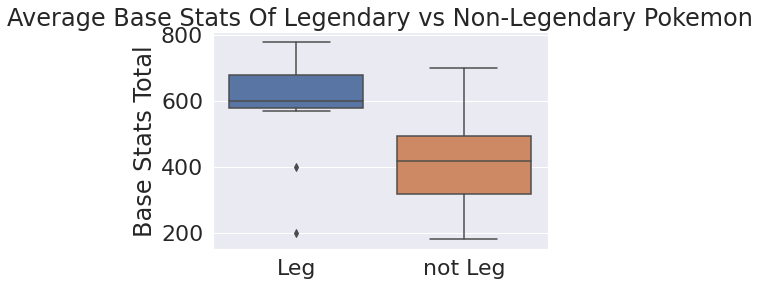

In [ ]:
df_leg = df[df.is_legendary == 1]
df_not_leg = df[df.is_legendary == 0]
df4 = [df_leg.base_total, df_not_leg.base_total]

type_comp = sns.boxplot(data = df4)
type_comp.set_xticklabels(['Leg','not Leg']);
type_comp.set(ylabel='Base Stats Total');
plt.title("Average Base Stats Of Legendary vs Non-Legendary Pokemon");

Legendary pokemon are much more powerful than most non-legendary pokemon with there being some exceptions as shown by the box plot, excluding some outliers. Those outliers being Cosmog and Cosmoem respectively. Those two legendary pokemon are weak because they are not the final form of that legendary pokemon.

# Potential Data Science
We believe this dataset can be used in a few different ways employing Data Science methods. One potential idea would be to create the most optimal team based on the data analysis and findings from the pokemon dataset. Or there is even potential to create an optimal team based on the opponent's team. We believe the dataset contains ample information to perform these tasks. Our findings provide information such as, which generation has the strongest Pokemon and the strongest types. Also more fine details such as if dual-type Pokemon are stronger and if legendary Pokemon are stronger than regular Pokemon. We believe this is sufficient information for an algorithm to find an optimal team. Another idea would be to predict the statistics for the next generation or even create a roster of new Pokemon for the next generation. Although there are some fluctuations, there is a trend in how the statistics of Pokemon have changed over the generations.


# Conclusion
During our time with this dataset, we have learned of many trends in Pokemon that we did not notice before. Trends such as certain generations being stronger on average than others or how certain types are more prominent in some generations. We have also learned that while this Pokemon dataset seems to contain a lot of information, we did not use many of the columns since they could not be analyzed or there was no correlation between them. Though, it may have been more beneficial to delete these columns as it can make working with the data easier and make the dataframes/graphs easier to read. We also considered finding a dataset with even more useful information such as data from player battles. From that data, we can use statistics such as the win/lose ratio of Pokemon for further analysis. One limitation we had while using this data was that the eighth generation of Pokemon was missing, and some Pokemon from the seventh generation were also missing. If the dataset was complete, we would have more up-to-date and accurate results. Although we are satisfied with what we found using this dataset, we aim to improve if we perform any future data analysis in the future.